In [116]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, recall_score, accuracy_score, precision_score

In [117]:
df = pd.read_csv('heart.csv')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [119]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [120]:
print(df.isna().sum())

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


In [121]:
print(df.duplicated().sum())

0


In [122]:
num_cols = ['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak']
cat_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina']

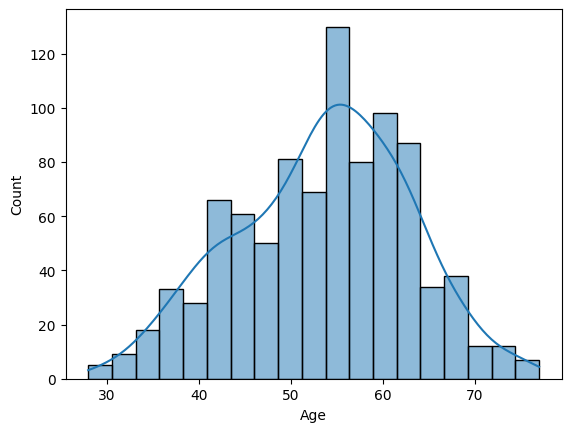

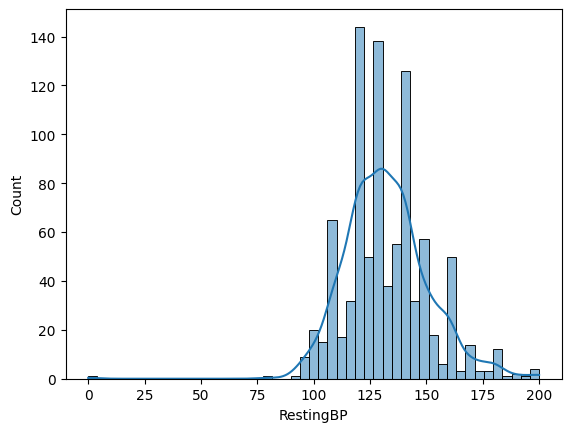

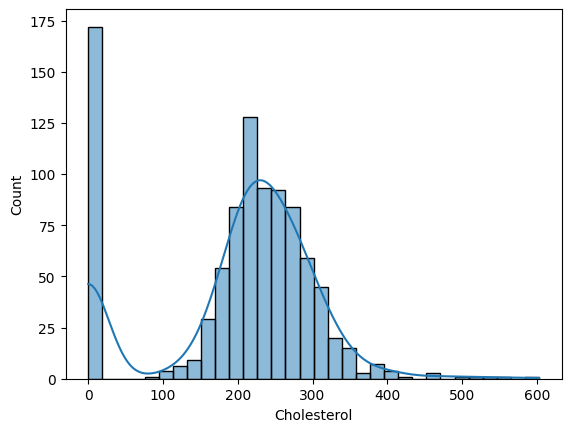

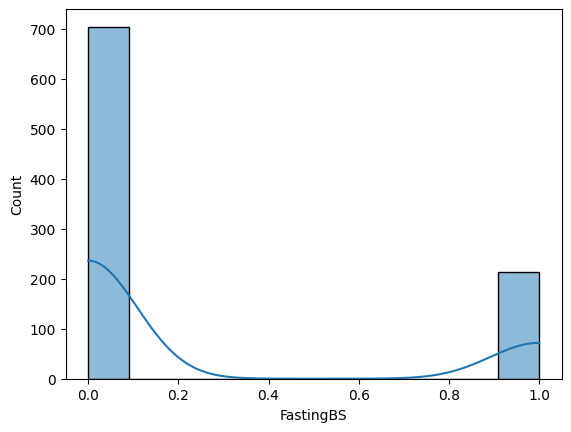

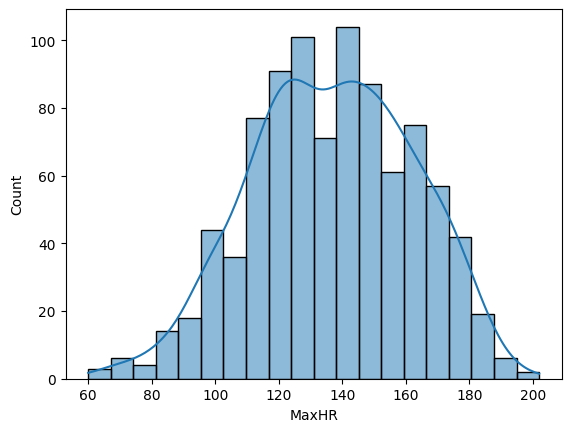

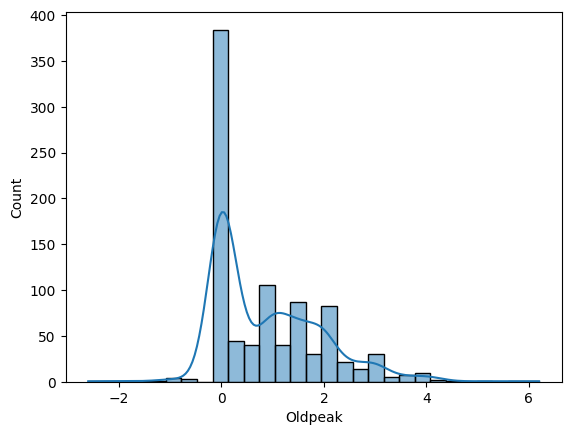

In [123]:
for i in num_cols :
  sns.histplot(df[i], kde = True)
  plt.show()

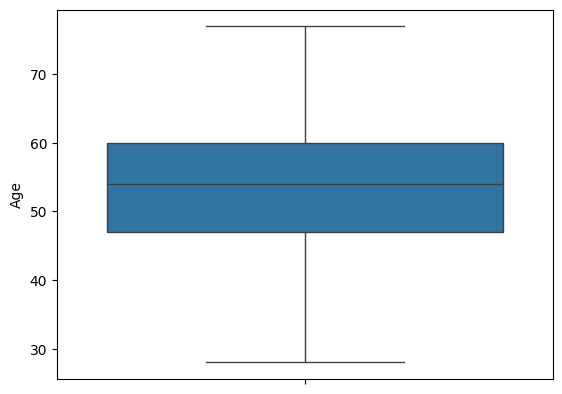

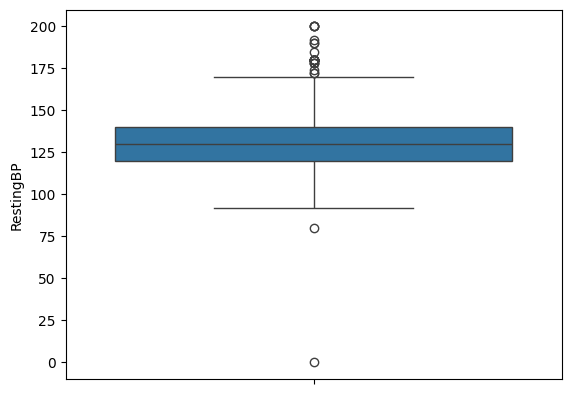

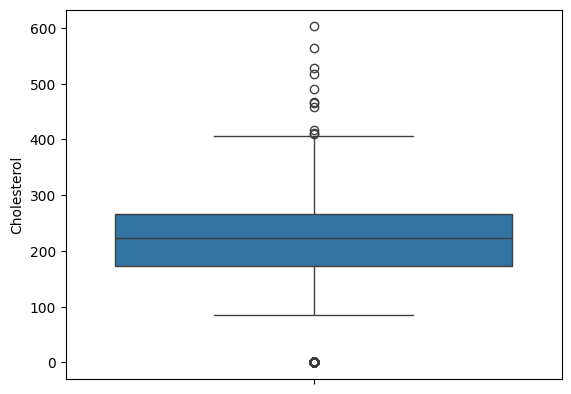

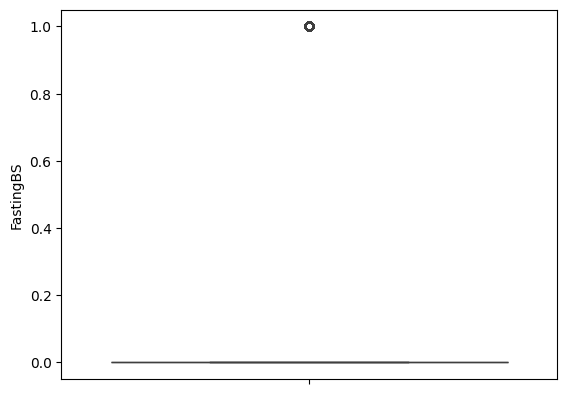

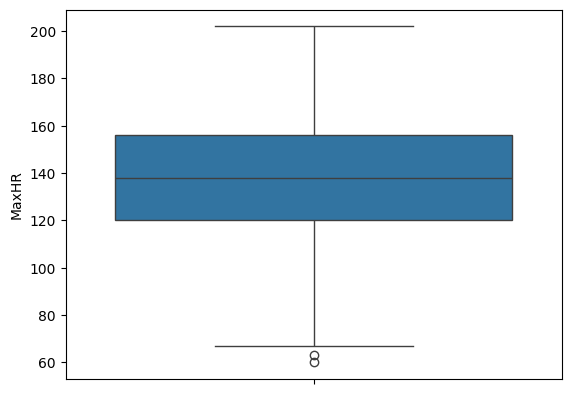

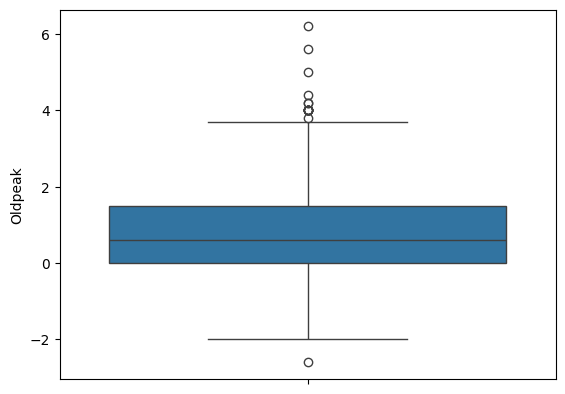

In [124]:
for i in num_cols :
  sns.boxplot(df[i])
  plt.show()

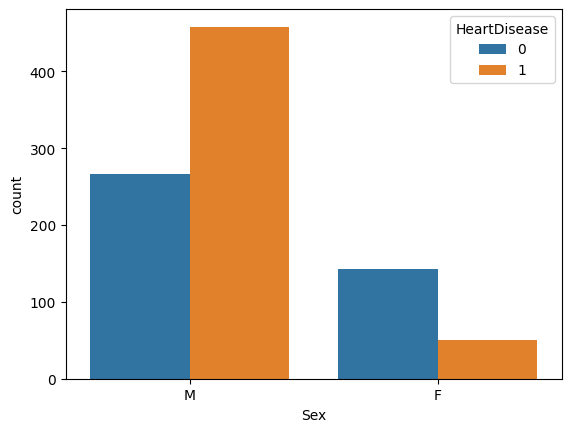

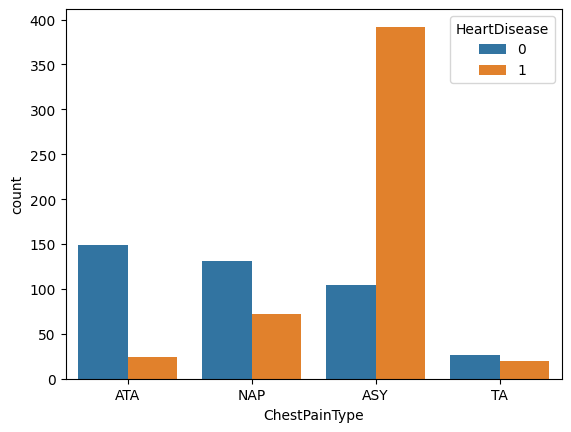

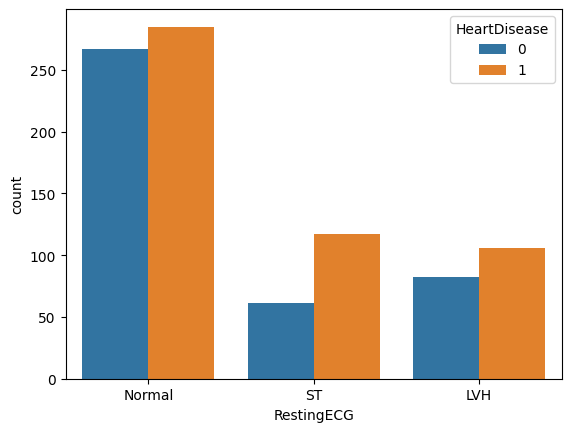

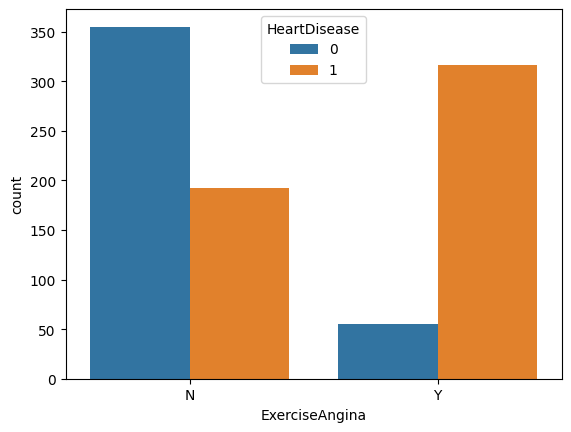

In [125]:
for i in cat_cols :
  sns.countplot(x = i, hue = 'HeartDisease', data = df)
  plt.show()

In [126]:
x = df.drop('HeartDisease', axis = 1)
y = df['HeartDisease']

In [127]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [128]:
prepocessor = ColumnTransformer(transformers=[
    ('num', RobustScaler(), num_cols),
    ('cat', OneHotEncoder(), cat_cols)
])

x_train_scaled = prepocessor.fit_transform(x_train)
x_test_scaled = prepocessor.transform(x_test)

In [132]:
models = {
    'Logistic regression' : LogisticRegression(),
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(n_estimators=100),
    'knn' : KNeighborsClassifier(n_neighbors=3),
    'Xgboost' : XGBClassifier(),
    'svm' : SVC()
}

result = []

for name, model in models.items() :
  model.fit(x_train_scaled, y_train)
  y_pred = model.predict(x_test_scaled)

  result.append({
      'model' : name,
      'accuracy' : accuracy_score(y_test, y_pred),
      'f1' : f1_score(y_test, y_pred),
      'recal' : recall_score(y_test, y_pred),
      'precision' : precision_score(y_test, y_pred)
  })

result_df = pd.DataFrame(result).sort_values(by = 'f1', ascending=False)
result_df

,model,accuracy,f1,recal,precision
0,Logistic regression,0.826087,0.846154,0.822430,0.871287
2,Random Forest,0.804348,0.826923,0.803738,0.851485
4,Xgboost,0.804348,0.823529,0.785047,0.865979
3,knn,0.793478,0.813725,0.775701,0.855670
5,svm,0.771739,0.798077,0.775701,0.821782
1,Decision Tree,0.684783,0.721154,0.700935,0.742574
